In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [5]:
data = pd.read_csv("D:/python/Depression data/depression_dataset.csv")

In [6]:
data.shape

(1999, 16)

In [7]:
data.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1999 non-null   object 
 1   Age                           1999 non-null   int64  
 2   Marital Status                1999 non-null   object 
 3   Education Level               1999 non-null   object 
 4   Number of Children            1999 non-null   int64  
 5   Smoking Status                1999 non-null   object 
 6   Physical Activity Level       1999 non-null   object 
 7   Employment Status             1999 non-null   object 
 8   Income                        1999 non-null   float64
 9   Alcohol Consumption           1999 non-null   object 
 10  Dietary Habits                1999 non-null   object 
 11  Sleep Patterns                1999 non-null   object 
 12  History of Mental Illness     1999 non-null   object 
 13  His

In [10]:
Number_of_depression_person = data["Chronic Medical Conditions"].value_counts()
print(Number_of_depression_person)

Chronic Medical Conditions
No     1368
Yes     631
Name: count, dtype: int64


In [11]:
data["Income"].describe()

count      1999.000000
mean      51131.643007
std       40583.936900
min          68.900000
25%       22061.795000
50%       38207.620000
75%       76596.360000
max      209894.250000
Name: Income, dtype: float64

Sorting on the basis of Income

In [12]:

bins = [0, 10000, 30000, 80000, float("inf")]
labels =["Less than 10000","Less than 30000", "Less than 80000", "More than 80000"]
data_sorting = pd.cut(data["Income"],bins=bins, labels=labels)

In [13]:
print(data_sorting.value_counts())

Income
Less than 80000    721
Less than 30000    607
More than 80000    466
Less than 10000    205
Name: count, dtype: int64


In [14]:
number_of_incomeholder= data_sorting.value_counts()
print(number_of_incomeholder)

Income
Less than 80000    721
Less than 30000    607
More than 80000    466
Less than 10000    205
Name: count, dtype: int64


In [15]:
Pivot_table= pd.pivot_table(
    data,
    index="Chronic Medical Conditions",
    columns = data_sorting,
    values= "Income",
    aggfunc='count')

C:\Users\yogen\AppData\Local\Temp\ipykernel_12316\2666853503.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  Pivot_table= pd.pivot_table(


In [16]:
Pivot_table.head()

Income,Less than 10000,Less than 30000,Less than 80000,More than 80000
Chronic Medical Conditions,,,,
No,129,410,499,330
Yes,76,197,222,136


Conculsion : Income group 30000 < X > 80000 has been encoutered more number then others.

<Figure size 600x700 with 0 Axes>

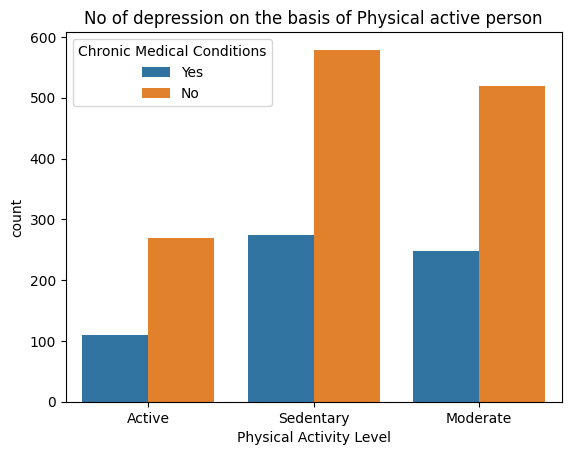

<Figure size 600x700 with 0 Axes>

In [17]:
sns.countplot(data, x="Physical Activity Level", hue="Chronic Medical Conditions")
plt.title("No of depression on the basis of Physical active person")
plt.figure(figsize=(6,7))

In [18]:
df = pd.DataFrame(data)

In [19]:
Gb= df.groupby("Chronic Medical Conditions").agg({"Marital Status":"count"})
print(Gb)

                            Marital Status
Chronic Medical Conditions                
No                                    1368
Yes                                    631


<Figure size 600x700 with 0 Axes>

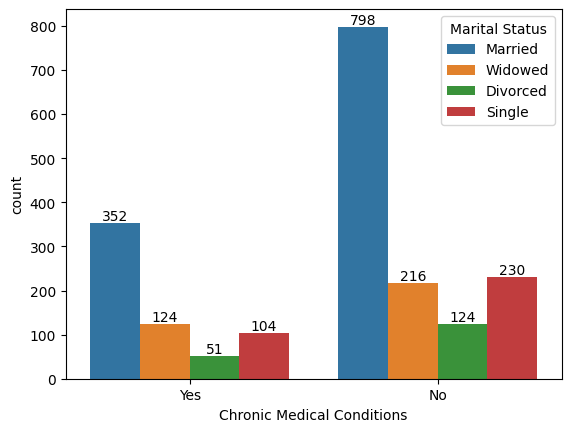

<Figure size 600x700 with 0 Axes>

In [20]:
ax= sns.countplot(data, x="Chronic Medical Conditions", hue="Marital Status")
for container in ax.containers:
    ax.bar_label(container)
plt.figure(figsize=(6,7))

## *Separting data (data vs Outcome)*

In [21]:
encoder = LabelEncoder()

In [22]:
data['Name'] = encoder.fit_transform(data['Name'])
data['Marital Status'] = encoder.fit_transform(data['Marital Status'])

data['Education Level'] = encoder.fit_transform(data['Education Level'])
data['Physical Activity Level'] = encoder.fit_transform(data['Physical Activity Level'])
data['Chronic Medical Conditions'] = encoder.fit_transform(data['Chronic Medical Conditions'])

data['Smoking Status'] = encoder.fit_transform(data['Smoking Status'])
data['Employment Status'] = encoder.fit_transform(data['Employment Status'])
data['Alcohol Consumption'] = encoder.fit_transform(data['Alcohol Consumption'])
data['Dietary Habits'] = encoder.fit_transform(data['Dietary Habits'])
data['Sleep Patterns'] = encoder.fit_transform(data['Sleep Patterns'])
data['History of Mental Illness'] = encoder.fit_transform(data['History of Mental Illness'])
data['History of Substance Abuse'] = encoder.fit_transform(data['History of Substance Abuse'])
data['Family History of Depression'] = encoder.fit_transform(data['Family History of Depression'])


In [23]:
X = data.drop(columns = "Chronic Medical Conditions", axis=1)
Y = data["Chronic Medical Conditions"]
print(X.head())
print(Y.head())

   Name  Age  Marital Status  Education Level  Number of Children  \
0   354   31               1                1                   2   
1   747   55               1                2                   1   
2  1726   78               3                3                   1   
3   325   58               0                3                   3   
4  1403   18               2                2                   0   

   Smoking Status  Physical Activity Level  Employment Status     Income  \
0               2                        0                  1   26265.67   
1               2                        2                  0   42710.36   
2               2                        2                  0  125332.79   
3               2                        1                  1    9992.78   
4               2                        2                  1    8595.08   

   Alcohol Consumption  Dietary Habits  Sleep Patterns  \
0                    2               1               0   
1           

# Splitting data

In [24]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(1599, 15) (400, 15) (1599,) (400,)


# Training the model 

In [26]:
classifier = svm.SVC(kernel="linear")

In [27]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [31]:
X_train_prediction = classifier.predict(X_train)

In [32]:
training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [33]:
print(training_data_accuracy)

0.6691682301438399


Accuracy Score on test data

In [41]:
X_test_prediction= classifier.predict(X_test)

In [42]:
training_data_accuracy =accuracy_score(X_test_prediction, Y_test)

In [43]:
print("Accuracy score of test data: ", training_data_accuracy)

Accuracy score of test data:  0.66
